In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import matplotlib.pyplot as plt
%matplotlib inline

t = np.arange(0,1500)
x = np.sin(0.02*t)+ np.random.rand(1500) * 2

train,test = x[0:1000], x[1000:]

# convert into dataset data and label
def convertToDataset(data, step):
    #data = np.append(data,np.repeat(data[-1,],step))
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

Using TensorFlow backend.
C:\Users\shadm\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\shadm\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\shadm\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\shadm\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
train_step = 10
test_step = 20

trainX,trainY =convertToDataset(train,train_step)
testX,testY =convertToDataset(test,test_step)

trainX = np.reshape(trainX, (trainX.shape[0],  trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0],testX.shape[1], 1))

In [3]:
print(trainX.shape)
print(testX.shape)

(990, 10, 1)
(480, 20, 1)


In [4]:
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(None, 1),  activation="tanh"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')

In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 64)                4224      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.input

<tf.Tensor 'simple_rnn_1_input:0' shape=(?, ?, 1) dtype=float32>

In [7]:
history = model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)


Epoch 1/100
 - 0s - loss: 0.4427
Epoch 2/100
 - 0s - loss: 0.3899
Epoch 3/100
 - 0s - loss: 0.3860
Epoch 4/100
 - 0s - loss: 0.3734
Epoch 5/100
 - 0s - loss: 0.3748
Epoch 6/100
 - 0s - loss: 0.3753
Epoch 7/100
 - 0s - loss: 0.3701
Epoch 8/100
 - 0s - loss: 0.3667
Epoch 9/100
 - 0s - loss: 0.3653
Epoch 10/100
 - 0s - loss: 0.3602
Epoch 11/100
 - 0s - loss: 0.3588
Epoch 12/100
 - 0s - loss: 0.3510
Epoch 13/100
 - 0s - loss: 0.3551
Epoch 14/100
 - 0s - loss: 0.3457
Epoch 15/100
 - 0s - loss: 0.3451
Epoch 16/100
 - 0s - loss: 0.3489
Epoch 17/100
 - 0s - loss: 0.3447
Epoch 18/100
 - 0s - loss: 0.3450
Epoch 19/100
 - 0s - loss: 0.3433
Epoch 20/100
 - 0s - loss: 0.3338
Epoch 21/100
 - 0s - loss: 0.3403
Epoch 22/100
 - 0s - loss: 0.3397
Epoch 23/100
 - 0s - loss: 0.3372
Epoch 24/100
 - 0s - loss: 0.3301
Epoch 25/100
 - 0s - loss: 0.3284
Epoch 26/100
 - 0s - loss: 0.3250
Epoch 27/100
 - 0s - loss: 0.3281
Epoch 28/100
 - 0s - loss: 0.3285
Epoch 29/100
 - 0s - loss: 0.3265
Epoch 30/100
 - 0s - l

In [8]:
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

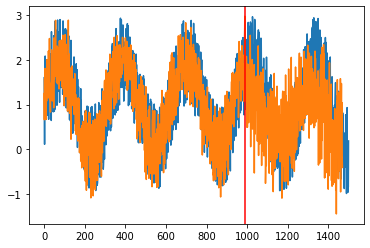

In [9]:
plt.plot(x)
plt.plot(predicted)
plt.axvline(len(trainX), c="r")
plt.show()